In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Importing the dataset
Patients = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Patients')
EDVisits = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')
AmbulatoryVisits = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'AmbulatoryVisits')
ReadmissionRegistry = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
Discharges = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Discharges')
Providers = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'Providers')
EDUnique= pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDUnique')

# Question -1 . Regression Analysis Using Python - Is there a relationship between Patient's pulse and patient's age, BP Systolic,  and BP Diastolic? 



In [34]:

import statsmodels.api as sm
warnings.filterwarnings("ignore", category=FutureWarning)

#Initializing the day and age_list variables
day = datetime.now()
age_list = []
columns = ['PatientID', 'Age', 'BPDiastolic','BPSystolic','Pulse']
PatientID_BP_Pulse = pd.DataFrame(columns=columns)
#Patient_AgeData = Patients

Patients_AmbulatoryVisits = pd.merge(Patients, AmbulatoryVisits, left_on='PatientID', right_on='PatientMRN', how='right')

#Calculating age from date of birth
for index, row in Patients_AmbulatoryVisits.iterrows():
    dateofbirth = row['DateOfBirth']
    age_timedelta = (day-dateofbirth)
    age_years = age_timedelta.days//365.25
    PatientID_BP_Pulse = PatientID_BP_Pulse.append({'PatientID': row['PatientID'], 'Age': age_years,\
                                                    'BPDiastolic': row['BloodPressureDiastolic'], 'BPSystolic': row['BloodPressureSystolic'],\
                                                    'Pulse': row['Pulse']}, ignore_index=True)
    
# Replace NaN values with 0
PatientID_BP_Pulse= PatientID_BP_Pulse.dropna()  
#Normalizing the Age, BPDiastolic, BPSystolic & Pulse columns so they are all on the same scale
# Columns to normalize
columns_to_normalize = ['Age', 'BPDiastolic','BPSystolic','Pulse']

for col in columns_to_normalize:
    min_val = PatientID_BP_Pulse[col].min()
    max_val = PatientID_BP_Pulse[col].max()
    PatientID_BP_Pulse[col] = (PatientID_BP_Pulse[col] - min_val) / (max_val - min_val)

PatientID_BP_Pulse


,PatientID,Age,BPDiastolic,BPSystolic,Pulse
0,840.0,0.148148,0.875444,0.971429,0.660588
1,820.0,0.481481,0.636179,0.842857,0.806130
2,879.0,0.666667,0.445582,0.185714,0.616810
3,884.0,0.370370,0.438496,0.171429,0.643355
4,32.0,0.185185,0.316474,0.157143,0.783748
...,...,...,...,...,...
945,873.0,0.370370,0.710215,0.957143,0.400227
946,855.0,0.925926,0.842869,0.885714,0.466974
947,865.0,0.962963,0.313875,0.428571,0.231464
948,635.0,0.296296,0.694519,0.814286,0.064410


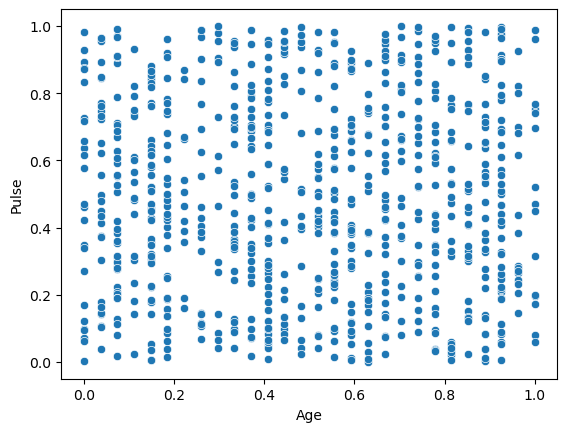

In [35]:
#Lets create scatter plots for pulse with each of the individual dependent variables to see if there is any linear relationship

y1= sns.scatterplot(x='Age',y='Pulse',data=PatientID_BP_Pulse)

<Axes: xlabel='BPDiastolic', ylabel='Pulse'>

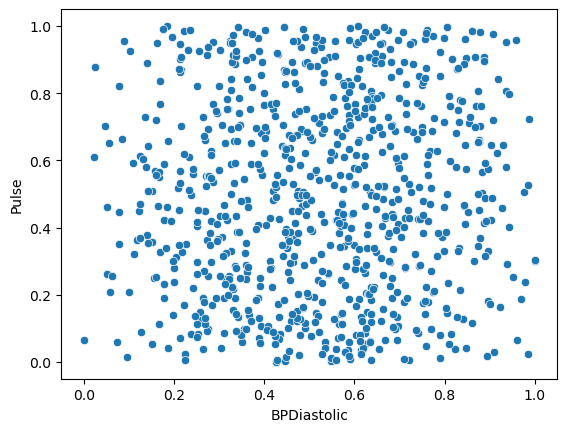

In [36]:
sns.scatterplot(x='BPDiastolic',y='Pulse',data=PatientID_BP_Pulse)

<Axes: xlabel='BPSystolic', ylabel='Pulse'>

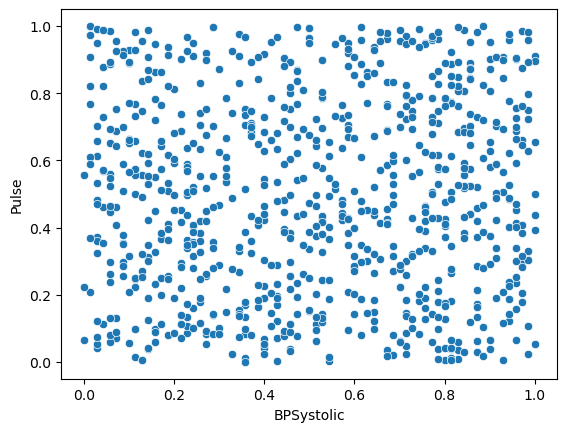

In [37]:
sns.scatterplot(x='BPSystolic',y='Pulse',data=PatientID_BP_Pulse)

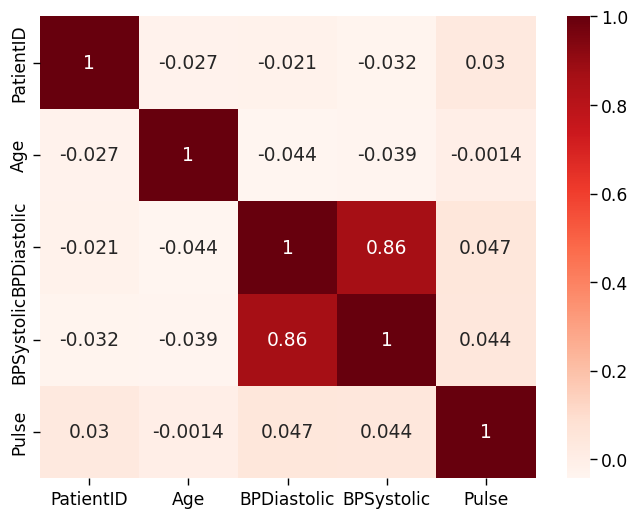

In [40]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)#set_context()is used to set the parameters that control the scaling of plot elements

df1 = PatientID_BP_Pulse.corr()
#crash_mx
sns.heatmap(df1, annot=True,cmap='Reds')
plt.show()


Based on the scatterplots & the correlation matrix, it appears that there is no apparent connection (or correlation) observed between Pulse and Age, BP_Diastolic, and BP_Systolic. Nevertheless, let's proceed and construct a regression model and extract summary statistics to further strengthen our findings.


In [38]:
# Define independent variables (features) and dependent variable
X = PatientID_BP_Pulse[['Age', 'BPDiastolic', 'BPSystolic']]
y = PatientID_BP_Pulse['Pulse']

# Add a constant to the features matrix (intercept term)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Pulse   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6120
Date:                Sun, 13 Aug 2023   Prob (F-statistic):              0.607
Time:                        00:20:17   Log-Likelihood:                -144.96
No. Observations:                 826   AIC:                             297.9
Df Residuals:                     822   BIC:                             316.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4577      0.032     14.252      


The dependent variable in this analysis is Pulse and independent variables are - Age, BP Diastolic, & BP Systolic.

R-squared: The coefficient of determination (R-squared) measures the proportion of the variance in the dependent variable that is explained by the independent variables. In this case, the R-squared value is quite low (0.002), indicating that only a very small portion of the variability in "Pulse" is explained by the independent variables.

Adj. R-squared: The adjusted R-squared is a modified version of R-squared that accounts for the number of independent variables in the model. Negative values or values close to zero suggest that the model may not fit the data well.

F-statistic: The F-statistic tests the overall significance of the regression model. A higher F-statistic indicates a more significant relationship between the independent and dependent variables. In this case, the F-statistic is 0.6120, with a p-value of 0.607, suggesting that the model is not statistically significant.

Overall, based on the summary statistics, the model does not provide strong evidence of significant relationships between the independent variables (Age, BPDiastolic, BPSystolic) and the dependent variable (Pulse). The low R-squared and high p-values mean that the model does not effectively explain the variability in the dependent variable. 

 # Question 2 - Implementing ANOVA - Analysis of Variance in Python - Does a statistically significant difference exist in the actual Length of Stay (LOS) among patients and their Discharge Dispositions?

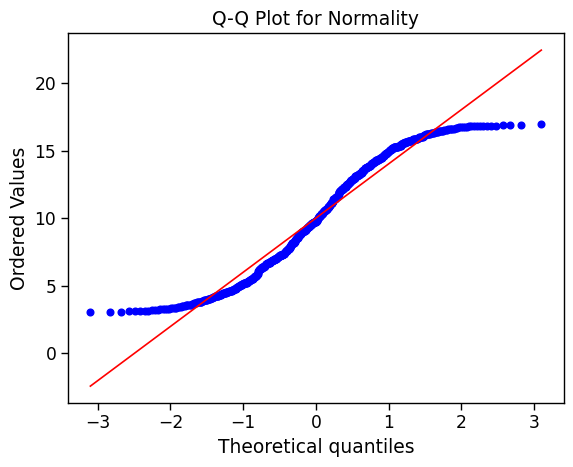

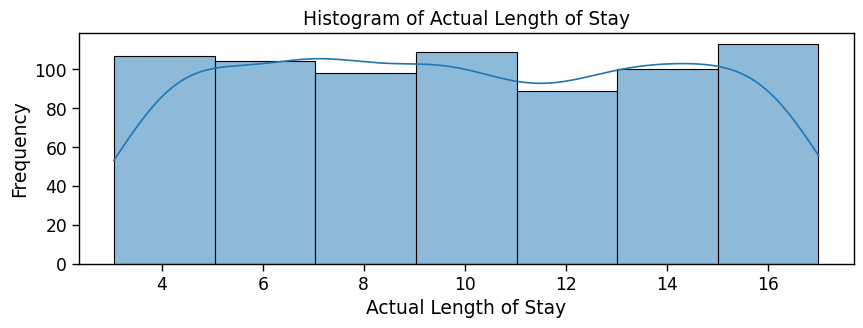

In [86]:
# Drop rows with missing values in ActualLOS
Readmission_Registry = ReadmissionRegistry.dropna(subset=['DischargeDate','AdmissionDate','DischargeDisposition'])

#Initialize the empty data frame to calculate actualLOS
ActualLOS = pd.Series() 

# Code block that calculates actual LOS
for index, row in Readmission_Registry.iterrows():
    los = row['DischargeDate'] - row['AdmissionDate']
    los_float = los.days + los.seconds / (60 * 60 * 24)
    ActualLOS = ActualLOS.append(pd.Series([los_float]), ignore_index=True)
    
# Appending ActualLOS to the Readmission_Registry DataFrame
Readmission_Registry['ActualLOS'] = ActualLOS

#Checking for assumptions: Data needs to satisfy certain assumptions for each of the statistcal techniques
# in order for it to be used for prediction/classification purposes

#Two ways to check for normality - QQ Plot & Histogram
# 1. Checking Normal distribution assumption with QQ plot
QQPlot = stats.probplot(Readmission_Registry['ActualLOS'], plot=plt)
plt.title("Q-Q Plot for Normality")
plt.show()


# 2. Checking Normal distribution assumption with histogram
plt.figure(figsize=(10, 3))
sns.histplot(Readmission_Registry['ActualLOS'], bins=7, kde=True)
plt.title("Histogram of Actual Length of Stay")
plt.xlabel("Actual Length of Stay")
plt.ylabel("Frequency")
plt.show()



Since the data (ActualLOS) does not appear to be normally distributed as preferred by the ANOVA algorithm, let us apply use MinMaxScaler() from the MinMAx
Scaler library in the sklearn to apply different transformation such as the log/squareroot/square/cube etc and apply the one that
makes the ActualLOS column look more like normally distributed data, so we can proceed with applying the ANOVA technique to find answers
to our question. (Note - Since our sample size is high with 721 observations we can also choose to ignore the assumption of normality)

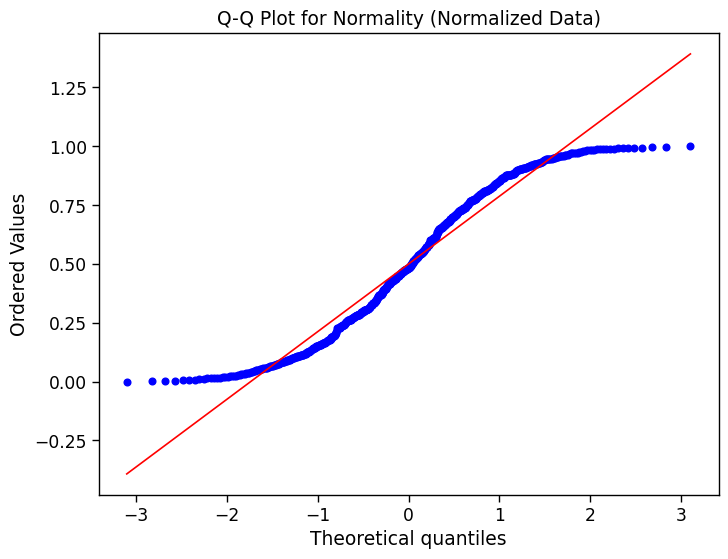

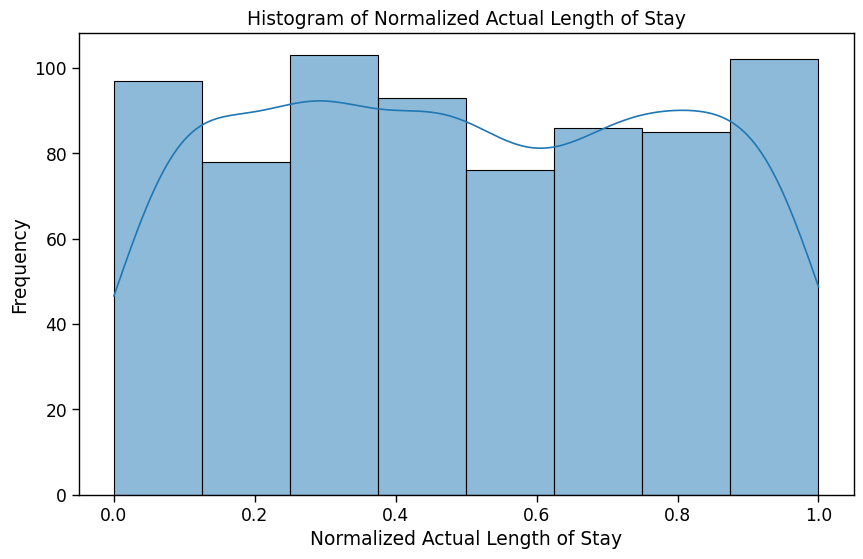

In [87]:

# Create a DataFrame with the ActualLOS Series
data = {'ActualLOS': ActualLOS}
df = pd.DataFrame(data)

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

#Two ways to check for normality - QQ Plot & Histogram
# Checking Normal distribution assumption with QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(normalized_df['ActualLOS'], plot=plt)
plt.title("Q-Q Plot for Normality (Normalized Data)")
plt.show()

# Checking Normal distribution assumption with histogram
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df, x='ActualLOS', bins=8, kde=True)
plt.title("Histogram of Normalized Actual Length of Stay")
plt.xlabel("Normalized Actual Length of Stay")
plt.ylabel("Frequency")
plt.show()


The application of transformation only slightly improved the ActualLOS to look like normally distributed data. For now, 
since our sample size of 721 is large enough we can choose to ignore the assumption of normality. In addition, though normally distributed data is preferred by  the ANOVA technique, since we are Welch's ANOVA function here, it is less sensitive to violations of normality, i.e, violations of normality does not affect our result when using Welch's ANOVA function and hence it can be ignored. 

In [88]:

# Apply Welch's ANOVA
groups = Readmission_Registry['DischargeDisposition'].unique()
grouped_data = [Readmission_Registry[Readmission_Registry['DischargeDisposition'] == group]['ActualLOS'] for group in groups]

welch_result = stats.f_oneway(*grouped_data)

print("Welch's ANOVA Results:")
print("Test Statistic:", welch_result.statistic)
print("p-value:", welch_result.pvalue)

Welch's ANOVA Results:
Test Statistic: 0.6156205964774554
p-value: 0.5405908206585286


Interpreting the results - 

p-value: A low p-value (< 0.05) suggests that the differences between group means are statistically significant. A high p-value suggests that the observed differences could likely be due to random chance.In this case, the p-value is 0.5406, is greater than the typical significance level of 0.05. This suggests that there is not have enough evidence to conclude that there are significant differences in the means of the groups. Therefore, based on the p-value, we can conclude that there is no statistically significant difference in the mean values of 'ActualLOS' grouped based on DischargeDispositions of 'Home', 'Transfer', 'Expired'. 

So the answer to our question is that there is no  statistically significant differences in the actual Length of Stay (LOS) among patients and their respective DischargeDispositions and hence in this ccase we cannnot use ActualLOS values to predict DischargeDispositions

# Question 3 - Implementing Independent sample t-test in Python - Can EDLOS be used to determine the EDDispostion(Admitted or Discharged)?

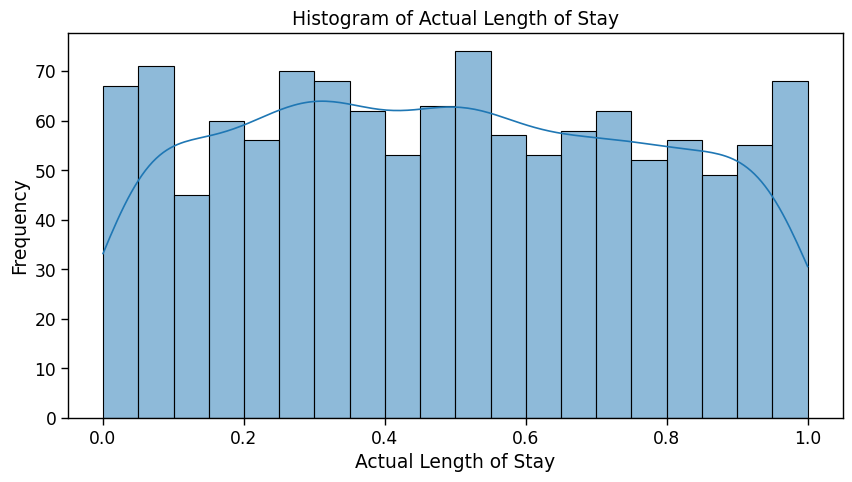

In [96]:

# Drop rows with missing values in ActualLOS
ED_Visits = EDVisits.dropna(subset=['EDDischargeTime','VisitDate','EDDisposition'])

#Initialize the empty data frame to calculate actualLOS
ActualLOS = pd.Series() 

# Code block that calculates actual LOS
for index, row in ED_Visits.iterrows():
    los = row['EDDischargeTime'] - row['VisitDate']
    los_float = los.days + los.seconds / (60 * 60 * 24)
    ActualLOS = ActualLOS.append(pd.Series([los_float]), ignore_index=True) 
    
# Appending ActualLOS to the Readmission_Registry DataFrame
ED_Visits['ActualLOS'] = ActualLOS

# 1. Checking for Normality Assumption
plt.figure(figsize=(10, 5))
sns.histplot(data=ED_Visits, x='ActualLOS', bins=20, kde=True)
plt.title("Histogram of Actual Length of Stay")
plt.xlabel("Actual Length of Stay")
plt.ylabel("Frequency")
plt.show()


Our ActualLOS in the ED_Visits dataframe looks somewhat normal, lets see if applying transformations improve normality. 

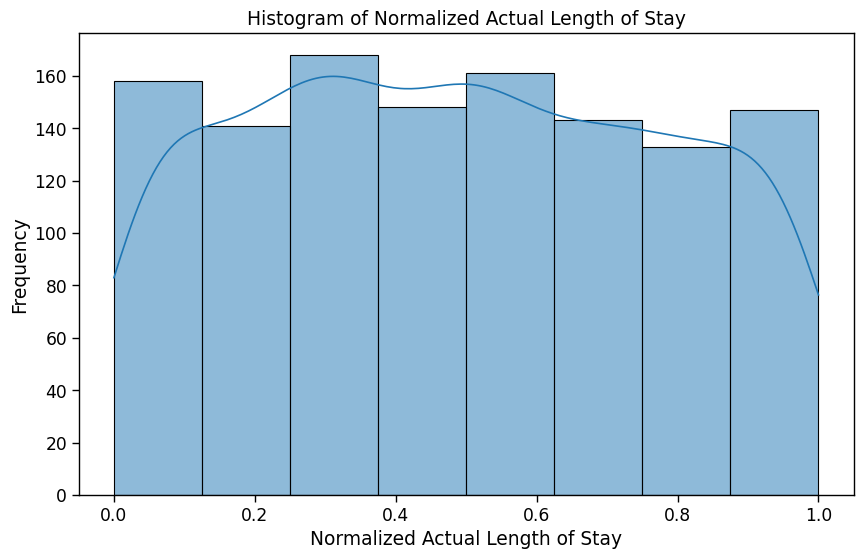

In [97]:
# Create a DataFrame with the ActualLOS Series
data = {'ActualLOS': ActualLOS}
df = pd.DataFrame(data)

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
normalized_data = scaler.fit_transform(df)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

# Checking Normal distribution assumption with histogram
plt.figure(figsize=(10, 6))
sns.histplot(normalized_df, x='ActualLOS', bins=8, kde=True)
plt.title("Histogram of Normalized Actual Length of Stay")
plt.xlabel("Normalized Actual Length of Stay")
plt.ylabel("Frequency")
plt.show()




Homoscedasticity, refers to a property of data where the variability (or spread as seen in a scatterplot) of values is roughly consistent across different levels or groups of another variable.For Example- if we are comparing two groups of people: Group 1 and Group 2. Homoscedasticity means that when you look at a specific measurement (let's say their weights) within each group, the spread of weights is roughly similar. In other words, the variability in weight within Group 1 is similar to the variability in height within Group 2.


Levene's test is a statistical test used to check the data  for homoscadasticity.If the p-value from Levene's test is small (typically less than 0.05), it means the data is not homoscadastic or in other words, it indicates the presence of heteroscedasticity.

In [98]:
# 2. Homogeneity of Variance Assumption (Levene's Test)
admitted_actuallos = ED_Visits[ED_Visits['EDDisposition'] == 'Admitted']['ActualLOS']
discharged_actuallos = ED_Visits[ED_Visits['EDDisposition'] == 'Discharged']['ActualLOS']
levene_test = stats.levene(admitted_actuallos, discharged_actuallos)

print("Levene's Test Results:")
print("Test Statistic:", levene_test.statistic)
print("p-value:", levene_test.pvalue)

Levene's Test Results:
Test Statistic: 0.14887624138625222
p-value: 0.6996801469839197


The p-value of 0.6 that is greater than 0.05 implies the data is homoscadastic which is desired for most of these stastical 
methods. Also our data looks somewhat normal based on the histogram. Therefore it satisfies the requirements of independent
sample t-test and we can proceed with the application of the method.

In [100]:
# Conducting the Two-Sample T-Test (assuming equal variances)
t_statistic, p_value = stats.ttest_ind(admitted_actuallos, discharged_actuallos, equal_var=True)

print("Two-Sample T-Test Results (Equal Variances Assumption):")
print("Test Statistic:", t_statistic)
print("p-value:", p_value)


Two-Sample T-Test Results (Equal Variances Assumption):
Test Statistic: -2.1296923381551265
p-value: 0.03340057430693084


Interpreting the results - Since the p-value of the t-test is less than 0.05, we can conclude that there is significant difference between the mean values of ActualLOS between patient group that gets admitted following ED visit and ones that get discharged following ED visit, and hence the actual LOS of EDVisit can be used to classify/predict whether or not the patient gets admitted or discharged. 

# Question 4 - Logistic Regression in Python - Predicting DischargeDisposition upon readmission using BP Systolic, BPDiastolic, ExpectedLOS and Expected Mortality be used to determine 

In [106]:

AV_RR = pd.merge(AmbulatoryVisits, ReadmissionRegistry, left_on='PatientMRN',right_on='PatientID')
AV_RR = AV_RR.dropna(subset=['BloodPressureSystolic','BloodPressureDiastolic','ExpectedLOS','ExpectedMortality'])
# Split the data into features (X) and target variable (y)
X = AV_RR[['BloodPressureSystolic', 'BloodPressureDiastolic','ExpectedLOS','ExpectedMortality']]
y = AV_RR['DischargeDisposition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler to standardize independent variables present in X_train, X_test
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))




Accuracy: 0.91
              precision    recall  f1-score   support

     Expired       0.00      0.00      0.00         5
        Home       0.91      1.00      0.95        67
    Transfer       0.00      0.00      0.00         2

    accuracy                           0.91        74
   macro avg       0.30      0.33      0.32        74
weighted avg       0.82      0.91      0.86        74



C:\Users\akila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interpreting the results - 
1. Accuracy - Refers to the percentage of correctly predicted instances and is measure of model's correctness.
2. This indicates that the overall proportion of correctly predicted instances (samples) is 91%. It's a measure of the model's overall correctness.
3. Precision column refers to the proportion of true positive predictions among all positive predictions for each class. In this case, the model made right prediction for 'Home' Discharge disposition 91% of the times, and 0 times for 'Transfer' and 'Expired' dispositions
4. Recall column refers to the proportion of true positive predictions among all actual positives for each class [Home, Transfered, Expired ]. In this case, the 'Expired' class has recall value of 0, meaning none of the actual 'Expired' cases were correctly predicted.The 'Home' class has a recall value of 1, indicating that all actual 'Home' instances were correctly predicted.The 'Transfer' class has a recall of 0, indicating that none of the actual 'Transfer' instances were correctly predicted.
5. Support column refers to number of actual occurences of each class in the dataset after available after data cleaning and removing rows with NAN/missing data. As seen here, the model trained well on 'Home' discharge disposition since more data was available for this class
6. Conclusion - Therfore, though the model works well for predicting discharge disposition of 'Home', additional data for the other classes ['Expired', 'Transfer'] is needed to train the model for predicting these cases with better accuaracy.


# Question 5 - Naive Bayes Classification in Python - Can ED length of stay, Acuity and ReasonForVisit be used to predict ED Disposition (Admitted or Discharged)?

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report

# Drop rows with missing values in ActualLOS
ED_Visits = EDVisits.dropna(subset=['ReasonForVisit','VisitDate','EDDischargeTime','EDDisposition', 'Acuity'])

#Initialize the empty data frame to calculate EDLOS
EDLOS = pd.Series() 

# Code block that calculates ED LOS
for index, row in ED_Visits.iterrows():
    los = row['EDDischargeTime'] - row['VisitDate']
    los_float = los.days + los.seconds / (60 * 60 * 24)
    EDLOS = EDLOS.append(pd.Series([los_float]), ignore_index=True)
    
# Appending ActualLOS to the Readmission_Registry DataFrame
ED_Visits['EDLOS'] = EDLOS

#Code to encode categorical variables using label encoding
#This chunk of code 0 or 1 for EDDisposition, values from 0-4 for different acuity levels,
# categorical labels starting from 0,1,2 ... and so on each unique reason for visit, to help 
# us create Naive Bayes Model for prediction

label_encoder = LabelEncoder()
ED_Visits['ReasonForVisit'] = label_encoder.fit_transform(ED_Visits['ReasonForVisit'])
ED_Visits['Acuity'] = label_encoder.fit_transform(ED_Visits['Acuity'])
ED_Visits['EDDisposition'] = label_encoder.fit_transform(ED_Visits['EDDisposition'])

# Code that splits the data into features (X) and target variable (y)
#In this case our input variables(denoted by X) are ReasonForVisit, Acuity and EDLOS
# and the output variable, the one we are trying to predict is assigned to y

X = ED_Visits[['ReasonForVisit', 'Acuity', 'EDLOS']]
y = ED_Visits['EDDisposition']

# Code to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Naive Bayes model
classifier = CategoricalNB()
classifier.fit(X_train, y_train)

# Make predictions y_pred using the test set X_test
y_pred = classifier.predict(X_test)

# Print the result of the Naive Bayes classification model
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

    Admitted       0.86      0.91      0.88       107
  Discharged       0.92      0.88      0.90       133

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



Interpretation of the results  - 

The results of the Naive Bayes is very similar to that of Logistic Regression, below is the explantion for the important parts of the result displayed.  

Precision: Refers to the ratio of correctly predicted positive observations (true positives) to the total predicted positives (true positives + false positives). For the "Admitted" class, the precision is 0.86, and for the "Discharged" class, it is 0.92. This means that when the model predicts a patient as "Admitted," it is correct 86% of the time, and when it predicts a patient as "Discharged," it is correct 92% of the time.

Recall: Recall column refers to the proportion of true positive predictions among all actual positives for each class. For the "Admitted" class, the recall value is 0.91, and for the "Discharged" class, it is 0.88. This means that the model can correctly identify 91% of the actual "Admitted" cases and 88% of the actual "Discharged" cases.

Accuracy: Refers to the overall accuracy of the model on the test dataset which and has a value of  0.89,  meaning it correctly predicted the class for 89% of the instances.

To summarize, the results indicate that the model has a relatively good performance in classifying between "Admitted" and "Discharged" cases. The overall accuracy is 89%, suggests that the model is performing well in classifying new cases as either Admitted/Discharged.

# Question 6 - MANOVA (Multivariate Analysis of Variance) in Python - Are there significant differences in BP Systolic, BP Diastolic, and Pulse among different patient groups based on their Primary Diagnosis?

In [115]:
from statsmodels.multivariate.manova import MANOVA

AV_RR = pd.merge(AmbulatoryVisits, ReadmissionRegistry, left_on='PatientMRN',right_on='PatientID', how='left')
AV_RR = AV_RR.dropna(subset=['BloodPressureSystolic','BloodPressureDiastolic','Pulse','PrimaryDiagnosis'])

# Define the dependent variables - should be of quantitative/ of type measure in Tableau
dependent_vars = ['BloodPressureDiastolic', 'BloodPressureSystolic', 'Pulse']

# Define the independent variable - should be of qualitative/ of type measure in Tableau
independent_var = 'PrimaryDiagnosis'

#The design matrix is organized in such a way that each row corresponds to an observation/row, and each column corresponds 
#to a different variable, either a dependent variable or an independent variable. The purpose of the design matrix is to 
#capture the relationship between the variables, which is needed for conducting multivariate analyses like MANOVA.

# Code to create a design matrix
design = AV_RR[[independent_var] + dependent_vars]


# Performing  MANOVA using the MANOVA(), note that dependent variables are mentioned with '+' signs and independent/categorical variable
#is specified using '~' sign
manova = MANOVA.from_formula(f"{'+'.join(dependent_vars)} ~ {independent_var}", data=design)

# Print MANOVA results

# Printing the MANOVA results
print(manova.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.1383 3.0000 348.0000 722.9926 0.0000
          Pillai's trace 0.8617 3.0000 348.0000 722.9926 0.0000
  Hotelling-Lawley trace 6.2327 3.0000 348.0000 722.9926 0.0000
     Roy's greatest root 6.2327 3.0000 348.0000 722.9926 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
    PrimaryDiagnosis    Value   Num DF   Den DF  F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9335 45.0000 1034.5999  0.5391 0.9946
         Pillai's trace 0.0680 45.0000 1050.0000  0.5415 0.

Interpreting the results - 

The first table, titled "Multivariate linear model," shows the overall test of significance for the effect of the independent variable (PrimaryDiagnosis) on the combined set of dependent variables. This is assessed using various multivariate tests available for MANOVA analysis such as the: Wilks' lambda, Pillai's trace, Hotelling-Lawley trace, and Roy's greatest root. All of these statistics have extremely small p-values (<0.05), meaning that there is a significant overall effect of PrimaryDiagnosis on the combined dependent variables.

The second table, titled "PrimaryDiagnosis," provides the results of the MANOVA for each individual dependent variable (BloodPressureDiastolic, BloodPressureSystolic, Pulse) with respect to the independent variable (PrimaryDiagnosis). Here,the p-values greater than 0.05 means that there is no significant effect of PrimaryDiagnosis on these individual dependent variables.

To summarize, the overall multivariate test indicates that there is a significant effect of PrimaryDiagnosis on the combined set of dependent variables. However, when looking at each individual dependent variable separately, there is no significant effect of PrimaryDiagnosis on any of them. This suggests that while there is an overall difference with all three variables combined(BPSystolic, BPDiastolic & Pulse) for groups formed based on PrimaryDiagnosis, the specific effects on individual variables are not statistically significant. 

# Question 7 - CHI-Squared Test in Python - Is there any relationship between ReasonForVisit categetories and EDDisposition in the EDVisits Table

In [45]:
#Importing the neccessary libraries
from scipy.stats import chi2_contingency

# To create a contingency table
contingency_table = pd.crosstab(EDVisits['ReasonForVisit'], EDVisits['EDDisposition'])

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#Printing the Results 
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Value:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Contingency Table:
EDDisposition        Admitted  Discharged
ReasonForVisit                           
Accident                   39           0
Bleeding                   16          15
Car Accident               17           0
Chest Pain                 94          15
Cough                       0           1
Fever                      46         188
Gun Shot                   16           0
Intoxication                0          30
Laceration                  0          30
Migraine                   47         109
Pneumonia                 136          65
Shortness of Breath        72          77
Stomach Ache               32         154

Chi-Square Value: 390.30352251289247
P-value: 4.271307039889388e-76
Degrees of Freedom: 12
Expected Frequencies:
[[ 16.75145955  22.24854045]
 [ 13.31526272  17.68473728]
 [  7.30191827   9.69808173]
 [ 46.81818182  62.18181818]
 [  0.4295246    0.5704754 ]
 [100.5087573  133.4912427 ]
 [  6.87239366   9.12760634]
 [ 12.88573812  17.11426188]
 [ 12


Interpretation of the results:

1. Contingency Table: This table shows the frequencies of the different combinations of the two categorical variables, "EDDisposition" and "ReasonForVisit" in the data set.

2. Chi-Square Value: Refers to Chi-Square test statistic, which measures the extent/degree of the association between the two variables. In this case, the Chi-Square value is approximately 390.30.

3. P-value: Refers p-value associated with the Chi-Square test statistic. A very low p-value (close to 0) suggests that the variables are likely associated.

4. The low p-value (4.27e-76) suggests that there is a significant association between the variables "EDDisposition" and "ReasonForVisit."The Chi-Square value (390.30) being relatively large also supports the rejection of the null hypothesis.Therfore based on the computed result, there is a statistically significant association between the "ReasonForVisit" and "EDDisposition" variables. This means that the reason for a patient's visit to the emergency department (ED) appears to have an influence on their disposition, i.e., whether they are admitted or discharged.

# 8. Non-parametric Analysis (Used for data that is not normally distributed when categorical/qualitative variable has more than two values)- Kruskal Wallis Test - Is there is any difference in Actual LOS based on different Primary Diagnosis in Readmission Registry

In [124]:
# Drop rows with missing values in ActualLOS
Readmission_Registry = ReadmissionRegistry.dropna(subset=['DischargeDate','AdmissionDate','PrimaryDiagnosis'])

#Initialize the empty data frame to calculate actualLOS
ActualLOS = pd.Series() 

# Code block that calculates actual LOS
for index, row in Readmission_Registry.iterrows():
    los = row['DischargeDate'] - row['AdmissionDate']
    los_float = los.days + los.seconds / (60 * 60 * 24)
    ActualLOS = ActualLOS.append(pd.Series([los_float]), ignore_index=True)
    
# Appending ActualLOS to the Readmission_Registry DataFrame
Readmission_Registry['ActualLOS'] = ActualLOS


# Code that performs Kruskal-Wallis test for ActualLOS values for each group formed based on Primary Diagnosus
result = stats.kruskal(*[group['ActualLOS'] for name, group in Readmission_Registry.groupby('PrimaryDiagnosis')])

# Printing the results
print("Kruskal-Wallis Test Results:")
print("Test Statistic:", result.statistic)
print("p-value:", result.pvalue)

# Interpreting the results
alpha = 0.05
if result.pvalue < alpha:
    print("There is a significant difference in ActualLOS values for different PrimaryDiagnosis.")
else:
    print("There is no  significant difference in ActualLOS values for different PrimaryDiagnosis.")


Kruskal-Wallis Test Results:
Test Statistic: 14.565770280754805
p-value: 0.5566417583239218
There is no  significant difference in ActualLOS values for different PrimaryDiagnosis.


# 9. Non-parametric Analysis(Used for data that is not normally distributed when categorical variable has two values)- Man Whitney U Test- Is there any difference in EDDisposition based on EDLOS

In [132]:
# Drop rows with missing values in ActualLOS
ED_Visits = EDVisits.dropna(subset=['EDDischargeTime','VisitDate','EDDisposition'])

#Initialize the empty data frame to calculate actualLOS
ActualLOS = pd.Series() 

# Code block that calculates actual LOS
for index, row in ED_Visits.iterrows():
    los = row['EDDischargeTime'] - row['VisitDate']
    los_float = los.days + los.seconds / (60 * 60 * 24)
    ActualLOS = ActualLOS.append(pd.Series([los_float]), ignore_index=True) 
    
# Appending ActualLOS to the Readmission_Registry DataFrame
ED_Visits['ActualLOS'] = ActualLOS

# Perform Mann-Whitney U test for ActualLOS values for each level of EDDisposition
#This chunk of code computes the two unique dischrge dispostions in the EDVisits table
# & iteratively checks Admitted Vs. Discharged groups, and vice versa with Man-Whitney U test
# used to check whether or not mean values of EDLOS in this case, are close to each other
# are very different

unique_dispositions = ED_Visits['EDDisposition'].unique()
for disposition in unique_dispositions:
    group1 = ED_Visits[ED_Visits['EDDisposition'] == disposition]['ActualLOS']
    group2 = ED_Visits[ED_Visits['EDDisposition'] != disposition]['ActualLOS']
    
    # Calculate mean values of the two groups
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)
    
    result = stats.mannwhitneyu(group1, group2, alternative='two-sided')

  # Print the Mann-Whitney U test results and mean values
    print(f"Mann-Whitney U Test for {disposition} vs. the other disposition:")
    print("U-statistic:", result.statistic)
    print("p-value:", result.pvalue)
    print(f"Mean of {disposition} group: {mean_group1}")
    print(f"Mean of Other Dispositions group: {mean_group2}")
    
    # Interpret the test results based on a significance level (alpha) of 0.05
    alpha = 0.05
    if result.pvalue < alpha:
        print("There is a significant difference in ActualLOS values between groups.")
    else:
        print("There is no significant difference in ActualLOS values between groups.")
    
    print("")  # Print a blank line to separate the results of different tests


Mann-Whitney U Test for Admitted vs. the other disposition:
U-statistic: 163735.5
p-value: 0.03677644161022968
Mean of Admitted group: 0.46961142574613446
Mean of Other Dispositions group: 0.5055114759313407
There is a significant difference in ActualLOS values between groups.

Mann-Whitney U Test for Discharged vs. the other disposition:
U-statistic: 188524.5
p-value: 0.03677644161022968
Mean of Discharged group: 0.5055114759313407
Mean of Other Dispositions group: 0.46961142574613446
There is a significant difference in ActualLOS values between groups.



As seen from the result above the mean values for ED length of stay is significantly different for Admitted Vs. Discharged patients. 
In real world hospital setting a result like this could be useful to plan for resource allocation, staffing allocation etc, based on how
how long and how many patients are there in ED at any point in time